# Juntando R y Python

In [1]:
import pandas as pd#gestion de librerias
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import rpy2.robjects as ro #libs para combinar R y Python -- objetos
import rpy2.robjects.numpy2ri#conversion de tipos de datos entre numpy y R

In [3]:
rpy2.robjects.numpy2ri.activate()#activa las libs

In [4]:
codigo_r = """
saludar <- function(cadena){
    return(paste("Hola, ", cadena))
}
"""
#hola mundo con R

Las comillas permiten escribir codigo de R en este espacio Python

In [5]:
ro.r(codigo_r)#ejecuto el codigo de la linea anterior

R object with classes: ('function',) mapped to:
<SignatureTranslatedFunction - Python:0x00000182C8C02FC8 / R:0x00000182D36EB980>

Vamos a guardar el objeto R que contiene la funcion en una variable Python

In [6]:
saludar_py = ro.globalenv["saludar"] #puedo pasarle la funcion a Python 

Ahora podemos ejecutar el objeto que guardamos en Python

In [7]:
res = saludar_py("Antonio Banderas")
res[0]#donde tenemos el return

'Hola,  Antonio Banderas'

In [8]:
type(res)#el tipo de dato es un objeto de clase vector

rpy2.robjects.vectors.StrVector

Podemos acceder al codigo fuente de R

In [9]:
print(saludar_py.r_repr())

function (cadena) 
{
    return(paste("Hola, ", cadena))
}


## Llevando objetos de Python a R

In [10]:
var_de_python = ro.FloatVector(np.arange(1,5,0.1))#variable que hemos creado en Python
#vamos de 1 hasta 5 en saltos de 0.1

In [11]:
var_de_python

1.000000,1.100000,1.200000,1.300000,...,4.600000,4.700000,4.800000,4.900000


In [12]:
print(var_de_python.r_repr())#representacion en R de la variable

c(1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2, 2.1, 2.2, 
2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3, 3.1, 3.2, 3.3, 3.4, 3.5, 
3.6, 3.7, 3.8, 3.9, 4, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 
4.9)


Esta variable aun no esta disponible en R y no la podemos usar dentro de codigo R

In [13]:
ro.globalenv["var_a_r"] = var_de_python #agrego la variable de Python al entorno global que es compartido con R

In [14]:
ro.r("var_a_r")#ya puedo acceder a ella desde R (usando lib de objetos)

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9])

In [15]:
ro.r("sum(var_a_r)")#sumo el array (en el entorno de R)

array([118.])

In [16]:
ro.r("mean(var_a_r)")#promedio

array([2.95])

In [17]:
ro.r("sd(var_a_r)")# dv estandar

array([1.16904519])

Puedo seguir operando la variable previamente creada en Python. sin problema

In [18]:
np.sum(var_de_python)#suma

118.00000000000007

In [19]:
np.mean(var_de_python)#promedio

2.950000000000002

In [20]:
ro.r("summary(var_a_r)")#resumen o intro "summary"

array([1.   , 1.975, 2.95 , 2.95 , 3.925, 4.9  ])

In [21]:
#ro.r("hist(var_a_r, breaks = 4)") --- quita el comentario para ver el histograma

**NOTA IMPORTANTE**
Este histograma que hemos creado no se muestra aqui, pero **fijate en tu barra de tareas y veras que hay una nueva. Alli esta el grafico**]

## Trabajar de forma conjunta entre R y Python

una tarea comun en R es importar paquetes. Podemos hacerlo tambien desde python usando las libs de compatibilidad con R

In [22]:
from rpy2.robjects.packages import importr

In [23]:
ro.r("install.packages('extRemes')")# si os falla decidle 'n' al hacer la instalación
extremes = importr("extRemes") # library(extRemes) desde R a entorno Python

In [24]:
fevd = extremes.fevd

Puedo pedir ayuda y documentacion sobre ell uso de funciones R desde python

In [25]:
print(fevd.__doc__) #permite conocer para que sirve cada parametro

Python representation of an R function.
description
-----------


 Fit a univariate extreme value distribution functions (e.g., GEV, GP, PP, Gumbel, or Exponential) to data; possibly with covariates in the parameters.
 


fevd(
    x,
    data,
    threshold = rinterface.NULL,
    threshold_fun = ~,
    location_fun = ~,
    scale_fun = ~,
    shape_fun = ~,
    use_phi = False,
    type = c,
    method = c,
    initial = rinterface.NULL,
    span,
    units = rinterface.NULL,
    time_units = days,
    period_basis = year,
    na_action = <rpy2.rinterface.ListSexpVector - Python:0x00000182D9553530 / R:0x00000182D8706BB0>,
    optim_args = rinterface.NULL,
    priorFun = rinterface.NULL,
    priorParams = rinterface.NULL,
    proposalFun = rinterface.NULL,
    proposalParams = rinterface.NULL,
    iter = 9999.0,
    weights = 1.0,
    blocks = rinterface.NULL,
    verbose = False,
)

x :  `fevd`: `x` can be a numeric vector, the name of a column of `data` or a formula giving the data t

Para BigData los dataset casi siempre deben pasar por Python. Esto debido a la excelente potencia de Pandas

In [26]:
data = pd.read_csv("../datasets/time/time_series.txt", 
                   sep = "\s+", skiprows = 1, parse_dates = [[0,1]],#separador raro, las columnas 0 y uno van a formar una sola con la fecha
                   names = ["date", "time", "wind_speed"],
                   index_col = 0)

In [27]:
data.head(5)

,wind_speed
date_time,
1983-01-01 00:00:00,7.9
1983-01-01 01:00:00,8.2
1983-01-01 02:00:00,8.5
1983-01-01 03:00:00,9.0
1983-01-01 04:00:00,9.9


In [28]:
data.shape

(275352, 1)

**Pandas es potente** Pudimos cargar este dataset de 275.352 datos en menos de un segundo y medio

In [29]:
max_ws = data.wind_speed.groupby(pd.Grouper(freq="A")).max()

In [30]:
max_ws #fecha maxima velocidades del viento

date_time
1983-12-31    22.2
1984-12-31    25.5
1985-12-31    21.5
1986-12-31    22.5
1987-12-31    23.7
1988-12-31    22.5
1989-12-31    21.7
1990-12-31    29.7
1991-12-31    24.2
1992-12-31    23.8
1993-12-31    28.1
1994-12-31    23.4
1995-12-31    23.7
1996-12-31    25.6
1997-12-31    23.2
1998-12-31    24.9
1999-12-31    22.8
2000-12-31    24.6
2001-12-31    22.3
2002-12-31    25.5
2003-12-31    22.6
2004-12-31    24.0
2005-12-31    20.8
2006-12-31    23.5
2007-12-31    24.4
2008-12-31    24.1
2009-12-31    25.1
2010-12-31    19.4
2011-12-31    22.8
2012-12-31    24.2
2013-12-31    25.0
2014-12-31    25.3
Freq: A-DEC, Name: wind_speed, dtype: float64

Puedo dibujar los valores maximos del viento por año

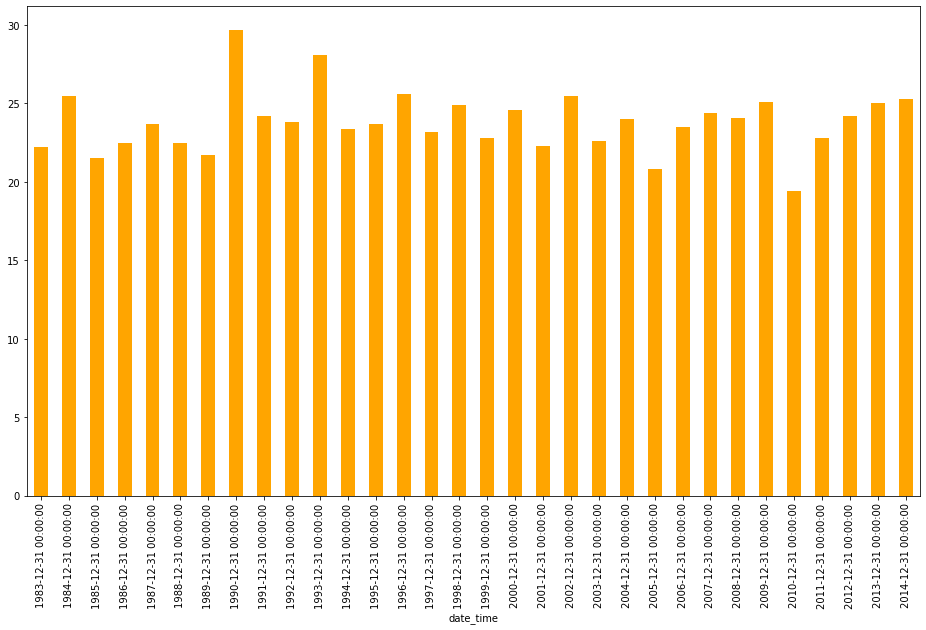

In [31]:
max_ws.plot(kind="bar", figsize=(16,9), color='orange')

In [32]:
result = fevd(max_ws.values, type="GEV", method = "GMLE")#me quedo solo con los valores NO LAS FECHAS

In [33]:
print(type(result))#vector de listas

<class 'rpy2.robjects.vectors.ListVector'>


In [34]:
result.r_repr #imprimir el objeto en R

<bound method RObjectMixin.r_repr of R object with classes: ('fevd',) mapped to:
<ListVector - Python:0x00000182DA1E4E88 / R:0x00000182DA0F5478>
[Vector, StrVector, FloatVector, Array, ..., StrVector, StrVector, ListVector, ListVector]
  call: <class 'rpy2.robjects.vectors.Vector'>
  R object with classes: ('fevd',) mapped to:
<Vector - Python:0x00000182DA1DBF08 / R:0x00000182D9AFC898>
[SignatureT..., Array, StrVector, StrVector]
  data.name: <class 'rpy2.robjects.vectors.StrVector'>
  R object with classes: ('character',) mapped to:
<StrVector - Python:0x00000182DA1FE888 / R:0x00000182D67F5520>
['struct..., '23.8, ..., '22.6, ..., '25.3),..., '']
  weights: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x00000182D37580C8 / R:0x00000182D8F52B38>
[1.000000]
  missing.values: <class 'rpy2.robjects.vectors.Array'>
  R object with classes: ('array',) mapped to:
<Array - Python:0x00000182DA1DB5C8 / R:0x00000182D65A2390>
[ 

In [35]:
print(result.names)#salida en formato R (No python)

 [1] "call"            "data.name"       "weights"         "missing.values" 

 [5] "in.data"         "x"               "priorFun"        "priorParams"    

 [9] "method"          "type"            "period.basis"    "par.models"     

[13] "const.loc"       "const.scale"     "const.shape"     "n"              

[17] "na.action"       "parnames"        "results"         "initial.results"



In [36]:
res = result.rx("results") #variables de R
print(res[0])

$par

  location      scale      shape 

23.0639415  1.7576913 -0.1628816 



$value

[1] 1e+16



$counts

function gradient 

       1        1 



$convergence

[1] 0



$message

NULL



$hessian

         location scale shape

location        0     0     0

scale           0     0     0

shape           0     0     0



$num.pars

$num.pars$location

[1] 1



$num.pars$scale

[1] 1



$num.pars$shape

[1] 1







In [37]:
loc, scale, shape = res[0].rx("par")[0]

In [38]:
print("loc: ", loc,"scale: ", scale,"shape: ", shape)

loc:  23.063941519915588 scale:  1.7576912874286317 shape:  -0.1628816367714792


## Función magica para R

In [41]:
%load_ext rpy2.ipython

Podemos pedir ayuda sobre los parametros y que cosas hace cada funcion asi:

In [42]:
help(rpy2.ipython.rmagic.RMagics.R) #help para pedir ayuda

Help on function R in module rpy2.ipython.rmagic:

R(self, line, cell=None, local_ns=None)
    ::
    
      %R [-i INPUT] [-o OUTPUT] [-n] [-w WIDTH] [-h HEIGHT] [-p POINTSIZE]
             [-b BG] [--noisolation] [-u {px,in,cm,mm}] [-r RES] [-c CONVERTER]
             [code [code ...]]
    
    Execute code in R, optionally returning results to the Python runtime.
    
    In line mode, this will evaluate an expression and convert the returned
    value to a Python object.  The return value is determined by rpy2's
    behaviour of returning the result of evaluating the final expression.
    
    Multiple R expressions can be executed by joining them with semicolons::
    
        In [9]: %R X=c(1,4,5,7); sd(X); mean(X)
        Out[9]: array([ 4.25])
    
    In cell mode, this will run a block of R code. The resulting value
    is printed if it would be printed when evaluating the same code
    within a standard R REPL.
    
    Nothing is returned to python by default in cell mode::

_"Execute code in R, optionally returning results to the Python runtime."_ es un fragmento de la ayuda devuelta

In [43]:
%R X=c(1,4,5,7); sd(X); mean(X)

array([4.25])

Las siguiente **son lineas de codigo en lenguaje R**

In [47]:
%%R
Y = c(2,4,3,9)
lm = lm(Y~X)
summary(lm)

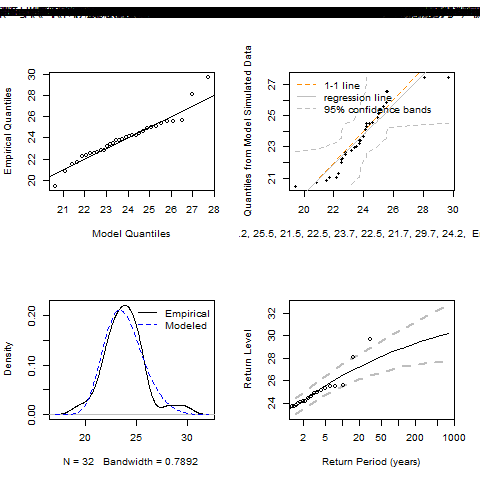

In [49]:
#grafico de R en Python. la variable result esta en Python pero ese plot es realizado por R
%R -i result plot.fevd(result)

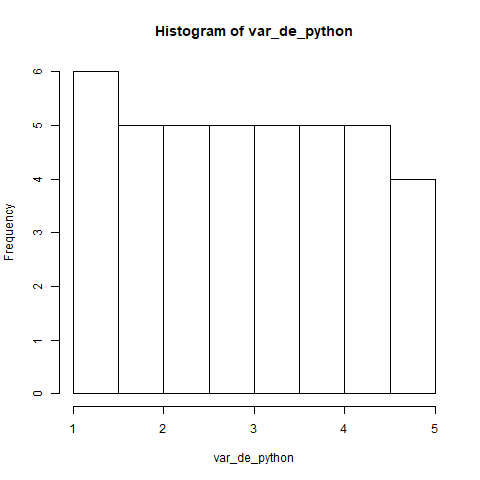

R object with classes: ('histogram',) mapped to:
<ListVector - Python:0x00000182DABEBBC8 / R:0x00000182D67BC780>
[Float..., IntVe..., Float..., Float..., StrVe..., BoolV...]
  breaks: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x00000182DABE4808 / R:0x00000182D4902260>
[1.000000, 1.500000, 2.000000, 2.500000, ..., 3.500000, 4.000000, 4.500000, 5.000000]
  counts: <class 'rpy2.robjects.vectors.IntVector'>
  R object with classes: ('integer',) mapped to:
<IntVector - Python:0x00000182DA4786C8 / R:0x00000182D60DF110>
[6, 5, 5, 5, 5, 5, 5, 4]
  density: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x00000182DA470308 / R:0x00000182D67BC2B0>
[0.300000, 0.250000, 0.250000, 0.250000, 0.250000, 0.250000, 0.250000, 0.200000]
  mids: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x00000182DABF8288 / R:0x00000182D67BC550>
[1.250000, 1.750000, 2.250000, 2.750000, 3.250000, 3.750000, 4.250000, 4.750000]
  xname: <class 'rpy2.robjects.vectors.StrVector'>
  R object with classes: ('character',) mapped to:
<StrVector - Python:0x00000182DABF8308 / R:0x00000182D8927CB0>
['var_de_python']
  equidist: <class 'rpy2.robjects.vectors.BoolVector'>
  R object with classes: ('logical',) mapped to:
<BoolVector - Python:0x00000182DABF8748 / R:0x00000182D37E3E10>
[       1]

In [53]:
#histograma incruistado aqui mismo
%R -i var_de_python hist(var_de_python)

Juntar dos lenguajes de programación con tan poco trabajo es excelente!

#### **Nota importante**
cuidado al usar estas funciones evitemos hacer este tipo de algoritmos:

```python
ro.globalenv["result"] = result #varaible de entorno global llamada result
ro.r("plot.fevd(result") #ESTO PUEDO DAR ERROR Y GENERAR UN OBJETO rpy2.rinterface.NULL
```

Por favor NO ejecutes eso, puede reinicar el notebook.
Esto se debe a que el objeto se llama igual en un lado (varaible global) y ademas en uno de los lenguajes

## Un ejemplo complejo de R, Python y Rmagic

In [55]:
metodos = ["MLE", "GMLE", "Bayesian", "Lmoments"]
tipos = ["GEV", "Gumbel"] #tenemos una serie de tipos y metodos, queremos ver cual funciona mejor

**R No es un lenguaje de programación, es una herramienta estadistica**
* Combina ambos para desatar el poder del Data Science

Ademas de mostrar lso valores resultantes del ajuste. Vamos a graficarlos y a realizar un test de bondad

Tipo de Ajuste:  GEV
Método del Ajuste:  MLE
$par

  location      scale      shape 

23.0517078  1.8085853 -0.1497984 



$value

[1] 66.22729



$counts

function gradient 

      28        6 



$convergence

[1] 0



$message

NULL



$hessian

           location      scale     shape

location  9.1825628 -0.3982934  11.22038

scale    -0.3982934 21.4422632  19.81854

shape    11.2203805 19.8185358 172.17411



$num.pars

$num.pars$location

[1] 1



$num.pars$scale

[1] 1



$num.pars$shape

[1] 1







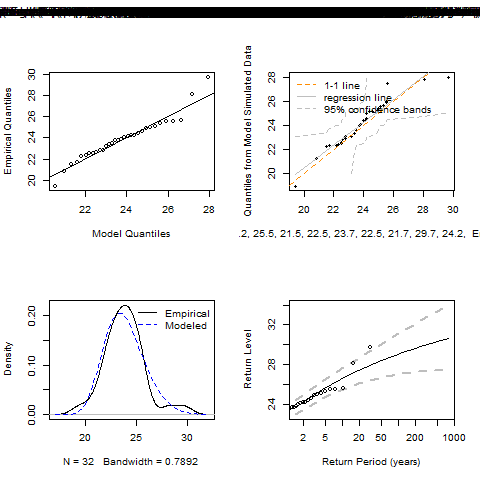

Tipo de Ajuste:  GEV
Método del Ajuste:  GMLE
$par

  location      scale      shape 

23.0639415  1.7576913 -0.1628816 



$value

[1] 1e+16



$counts

function gradient 

       1        1 



$convergence

[1] 0



$message

NULL



$hessian

         location scale shape

location        0     0     0

scale           0     0     0

shape           0     0     0



$num.pars

$num.pars$location

[1] 1



$num.pars$scale

[1] 1



$num.pars$shape

[1] 1







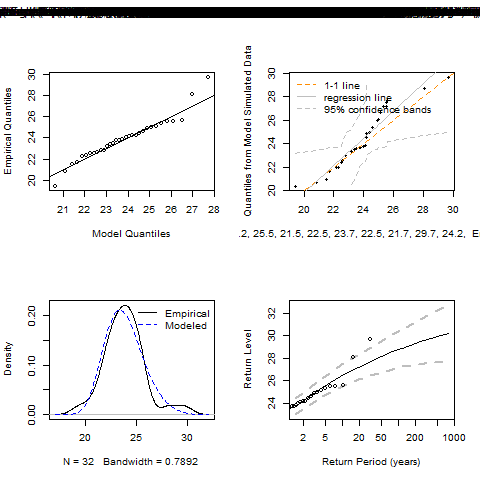

Tipo de Ajuste:  GEV
Método del Ajuste:  Bayesian
         location log.scale         shape new

    [1,] 23.06394 0.5640012 -1.628816e-01   0

    [2,] 23.06182 0.4907703 -1.484355e-01   3

    [3,] 23.08118 0.4907703 -1.484355e-01   1

    [4,] 23.17760 0.4911567 -1.932815e-01   1

    [5,] 23.15226 0.4943824 -1.349774e-01   3

    [6,] 23.10204 0.4670213 -1.122814e-01   2

    [7,] 23.10204 0.4670213 -1.122814e-01   0

    [8,] 23.10204 0.4336864 -1.122814e-01   1

    [9,] 23.08430 0.3751622 -1.122814e-01   2

   [10,] 23.20895 0.4610158 -1.122814e-01   1

   [11,] 23.31000 0.4617230  1.634784e-02   2

   [12,] 23.37188 0.4839956 -1.136647e-01   3

   [13,] 23.31305 0.4839956 -1.254919e-01   2

   [14,] 23.39032 0.4982283 -1.382587e-01   3

   [15,] 23.39032 0.4982283 -1.382587e-01   0

   [16,] 23.39032 0.4982283 -1.382587e-01   0

   [17,] 23.39032 0.4982283 -1.382587e-01   0

   [18,] 23.52362 0.4345635 -1.382587e-01   2

   [19,] 23.52362 0.4345635 -1.382587e-01   0

   [20,] 2

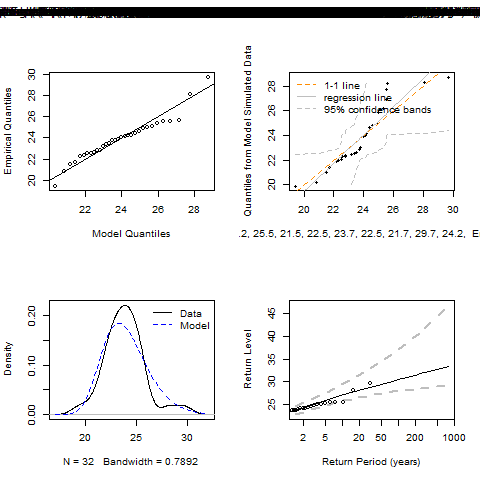

Tipo de Ajuste:  GEV
Método del Ajuste:  Lmoments
  location      scale      shape 

23.0639415  1.7576913 -0.1628816 



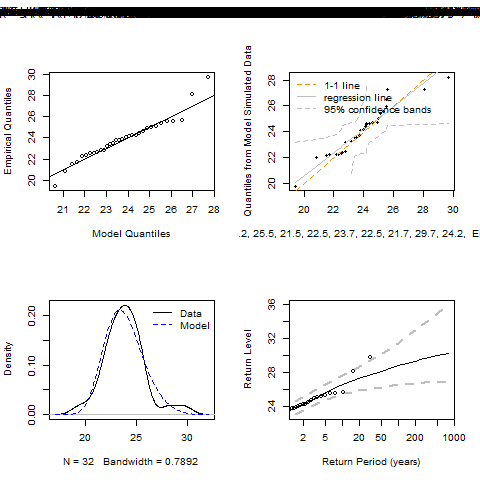

Tipo de Ajuste:  Gumbel
Método del Ajuste:  MLE
$par

 location     scale 

22.905876  1.814452 



$value

[1] 67.38487



$counts

function gradient 

      14        5 



$convergence

[1] 0



$message

NULL



$hessian

          location     scale

location  9.719762 -4.762621

scale    -4.762621 21.535378



$num.pars

$num.pars$location

[1] 1



$num.pars$scale

[1] 1



$num.pars$shape

NULL







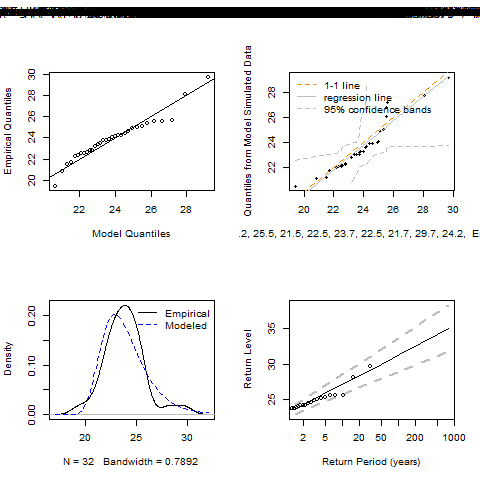

Tipo de Ajuste:  Gumbel
Método del Ajuste:  GMLE
$par

 location     scale 

22.905876  1.814452 



$value

[1] 67.38487



$counts

function gradient 

      14        5 



$convergence

[1] 0



$message

NULL



$hessian

          location     scale

location  9.719762 -4.762621

scale    -4.762621 21.535378



$num.pars

$num.pars$location

[1] 1



$num.pars$scale

[1] 1



$num.pars$shape

NULL







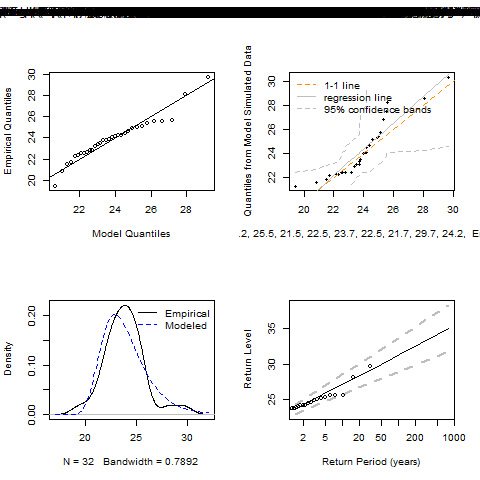

Tipo de Ajuste:  Gumbel
Método del Ajuste:  Bayesian


RRuntimeError: Error in res[1, (nloc + nsc + 1):np] <- initial$shape : 
  number of items to replace is not a multiple of replacement length


In [56]:
for t in tipos:
    for m in metodos:
        print("Tipo de Ajuste: ", t)
        print("Método del Ajuste: ", m)
        result = fevd(max_ws.values, method = m, type = t)#fevd es una funcion de R que previamente cargamos
        print(result.rx("results")[0])
        %R -i result plot.fevd(result)